In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import random as rn
import csv
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
# tensorflowの乱数シード固定(再現性の担保)
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(7)
rn.seed(7)

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

tf.set_random_seed(7)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [3]:
batch_size = 32
n_epochs = 50

# 画像データ取り込み


In [4]:
DATA_FOLDER = '/home/tamaru/scene_categorize/main/data'
datalist = pd.read_csv(os.path.join(DATA_FOLDER, 'stairs_frames_data.csv'), names=["img_path", "l_class", 's_class','timestamp'])
datalist

img_path l_class  \
0     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
1     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
2     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
3     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
4     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
5     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
6     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
7     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
8     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
9     /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
10    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
11    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
12    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
13    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
14    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
15    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
16    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
17    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
18    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
19    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
20    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
21    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
22    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
23    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
24    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
25    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
26    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
27    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
28    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
29    /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
...                                                 ...     ...   
5059  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5060  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5061  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5062  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5063  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5064  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5065  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5066  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5067  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5068  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5069  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5070  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5071  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5072  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5073  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5074  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5075  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5076  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5077  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5078  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5079  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5080  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5081  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5082  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5083  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5084  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5085  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5086  /home/tamaru/scene_categorize/main/data/stairs...  5gokan   
5087  /home/tamaru/scene_ca

In [5]:
dfs = datalist.drop(['l_class', 'timestamp'], axis=1)
dfs.groupby('s_class').count()

img_path
s_class                      
4gokan_stairs             750
5gokan_stairs_east        761
5gokan_stairs_west        866
8gokan_stairs_cnt         839
8gokan_stairs_east        775
denkisogokan_stairs      1098

In [6]:
s_class = dfs.s_class.unique()
num_s_class = len(s_class)
num_s_class

6

In [7]:
dfs.img_path.count()

5089

In [68]:
grad_test_img_path =[
    '/home/tamaru/scene_categorize/main/data/stairs_frames/4gokan/4gokan_stairs/4gokan_stairs_0_img_000149.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/4gokan/4gokan_stairs/4gokan_stairs_0_img_000675.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/5gokan/5gokan_stairs_east/5gokan_stairs_east_0_img_000050.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/5gokan/5gokan_stairs_east/5gokan_stairs_east_0_img_000163.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/5gokan/5gokan_stairs_west/5gokan_stairs_west_0_img_000043.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/5gokan/5gokan_stairs_west/5gokan_stairs_west_0_img_000236.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/8gokan/8gokan_stairs_cnt/8gokan_stairs_cnt_0_img_000085.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/8gokan/8gokan_stairs_cnt/8gokan_stairs_cnt_0_img_000316.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/8gokan/8gokan_stairs_east/8gokan_stairs_east_0_img_000100.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/8gokan/8gokan_stairs_east/8gokan_stairs_east_0_img_000518.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/denkisogokan/denkisogokan_stairs/denkisogokan_stairs_0_img_000068.png',
    '/home/tamaru/scene_categorize/main/data/stairs_frames/denkisogokan/denkisogokan_stairs/denkisogokan_stairs_0_img_000348.png'
]

In [9]:
# Markdown
from sklearn.preprocessing import LabelEncoder

In [10]:
# Markdown
le = LabelEncoder()
le.fit(dfs.s_class)
dfs["labels"] = le.transform(dfs.s_class)
dfs.groupby('labels')

In [11]:
# Markdown
cor_table = dfs.groupby('labels').s_class.unique()
cor_table = pd.DataFrame(cor_table)
cor_table

s_class
labels                       
0             [4gokan_stairs]
1        [5gokan_stairs_east]
2        [5gokan_stairs_west]
3         [8gokan_stairs_cnt]
4        [8gokan_stairs_east]
5       [denkisogokan_stairs]

In [12]:
# Markdown
dfs = dfs.drop(['s_class'], axis=1)

In [13]:
# Markdown
x = []
for i in range(len(dfs.img_path)):
    image = img_to_array(load_img(dfs.img_path[i], target_size=(224,224)))
    x.append(image)

In [14]:
# Markdown
y = dfs.labels
print(y)

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
5059    1
5060    1
5061    1
5062    1
5063    1
5064    1
5065    1
5066    1
5067    1
5068    1
5069    1
5070    1
5071    1
5072    1
5073    1
5074    1
5075    1
5076    1
5077    1
5078    1
5079    1
5080    1
5081    1
5082    1
5083    1
5084    1
5085    1
5086    1
5087    1
5088    1
Name: labels, Length: 5089, dtype: int64


In [15]:
# Markdown
#正規化
x = np.array(x, dtype='float32')/255

In [16]:
print(x.shape)
print(y.shape)

(5089, 224, 224, 3)
(5089,)


# train test & validation set split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x, x_valid, y, y_valid = train_test_split(x,y, random_state=42, test_size=0.2, stratify=y)

# EDA(探索的データ解析)


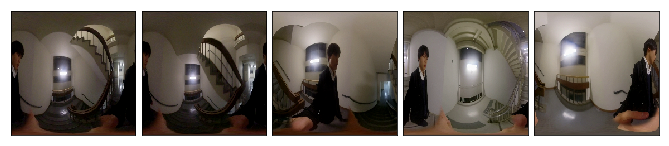

In [19]:
fig = plt.figure(figsize=(9,18))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x[i])

# VGG16(weight="ImageNet", include_top=False)

In [20]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, add, Add, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16

In [22]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

top(全結合層など)はデフォルトだとImageNetの全クラス数1000での出力になるので，
自作のアーキテクチャを使用する
top以外のモデルの重みは(ImageNetで)固定しない→学習をする

Fine-tuning(Flozen(Not training vgg layers))
training all layers -> acc: 0.1...

inputs = Input(shape=(224,224,3))
x1 = vgg_model(inputs)
x2 = Flatten()(x1)
x3 = Dense(256, activation='relu')(x2)
prediction = Dense(num_s_class, activation='softmax')(x3)
full_model = Model(inputs=inputs, outputs=prediction)
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto')
for layer in vgg_model.layers[:15]:
    layer.trainable = False
full_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
x1 = vgg_model.output

x2 = Flatten()(x1)
x3 = Dense(256, activation='relu')(x2)
prediction = Dense(num_s_class, activation='softmax')(x3)
full_model = Model(inputs=vgg_model.input, outputs=prediction)

early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto')
for layer in full_model.layers[:15]:
    layer.trainable = False
full_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

   # 層化抽出法(Stratified sampling)&KFold

In [26]:
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils

Using TensorFlow backend.


In [27]:
skf = StratifiedKFold(n_splits=5, random_state=42)
cvscores = []
#Stratified KFoldはlabel encoding化した整数ベクトルでないともちいることができない
x = np.array(x)
y = np.array(y)
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #One-hot化　CNNに入出力できるように整形
    y_train = np_utils.to_categorical(y_train, num_s_class)
    y_test = np_utils.to_categorical(y_test, num_s_class)
    full_model.fit(x_train, y_train, verbose=1, batch_size=batch_size, epochs=n_epochs,
              callbacks=[early_stopping], validation_split=0.2)
    scores = full_model.evaluate(x_test, y_test)
    print("%s: %.2f%%" % (full_model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Train on 2604 samples, validate on 651 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
2604/2604 [==============================] - 15s 6ms/sample - loss: 2.0145 - acc: 0.2085 - val_loss: 1.7887 - val_acc: 0.1951
Epoch 2/50
2604/2604 [==============================] - 11s 4ms/sample - loss: 1.7838 - acc: 0.2208 - val_loss: 1.7880 - val_acc: 0.1951
Epoch 3/50
2604/2604 [==============================] - 11s 4ms/sample - loss: 1.7816 - acc: 0.2208 - val_loss: 1.7889 - val_acc: 0.1951
Epoch 00003: early stopping
816/816 [==============================] - 3s 3ms/sample - loss: 1.7824 - acc: 0.2157
acc: 21.57%
Train on 2604 samples, validate on 652 samples
Epoch 1/50
2604/2604 [==============================] - 11s 4ms/sample - loss: 1.7815 - acc: 0.2204 - val_loss: 1.7890 - val_acc: 0.1963
Epoch 2/50
2604/2604 [==============================] - 11s 4ms/sample - loss: 1.7814 - acc: 0.2204 - val_loss: 1.7888 - val_acc: 0.1963
Epoch 3/50
2604/2604 [=========================

In [28]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

21.57% (+/- 0.03%)


In [29]:
y_pred = full_model.predict(x_valid)

In [30]:
y_valid = np_utils.to_categorical(y_valid)

In [31]:
y_pred = np.array(y_pred)
y_true = np.array(y_valid)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from scipy.sparse.csgraph import connected_components

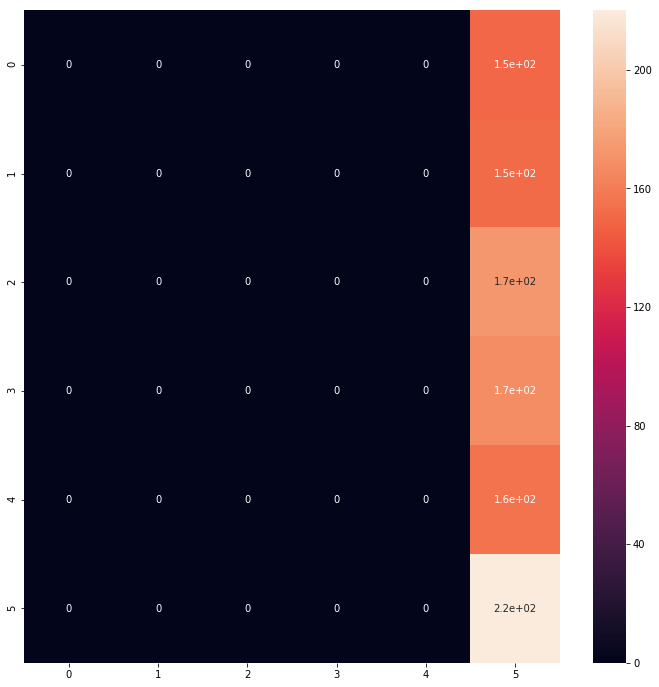

accuracy: 0.21611001964636542


In [33]:
cmx = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cmx, annot=True)
plt.show()
print('accuracy: {}'.format(accuracy_score
(y_true, y_pred)))

In [34]:
print(cor_table)

                      s_class
labels                       
0             [4gokan_stairs]
1        [5gokan_stairs_east]
2        [5gokan_stairs_west]
3         [8gokan_stairs_cnt]
4        [8gokan_stairs_east]
5       [denkisogokan_stairs]


# 中間層特徴量の可視化

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
x1 = vgg_model.get_layer('block1_pool').output
output1 = GlobalMaxPooling2D()(x1)
block_model1 = Model(inputs=vgg_model.input, outputs=output1)

In [37]:
x2 = vgg_model.get_layer('block2_pool').output
output2 = GlobalMaxPooling2D()(x2)
block_model2 = Model(inputs=vgg_model.input, outputs=output2)

In [38]:
x3 = vgg_model.get_layer('block3_pool').output
output3 = GlobalMaxPooling2D()(x3)
block_model3 = Model(inputs=vgg_model.input, outputs=output3)

In [39]:
x4 = vgg_model.get_layer('block4_pool').output
output4 = GlobalMaxPooling2D()(x4)
block_model4 = Model(inputs=vgg_model.input, outputs=output4)

In [40]:
x5 = vgg_model.get_layer('block5_pool').output
output5 = GlobalMaxPooling2D()(x5)
block_model5 = Model(inputs=vgg_model.input, outputs=output5)

In [41]:
block1 = block_model1.predict(x_train)
block2 = block_model2.predict(x_train)
block3 = block_model3.predict(x_train)
block4 = block_model4.predict(x_train)
block5 = block_model5.predict(x_train)

In [42]:
print(block1.shape)
print(block2.shape)
print(block3.shape)
print(block4.shape)
print(block5.shape)

(3259, 64)
(3259, 128)
(3259, 256)
(3259, 512)
(3259, 512)


# block1の特徴ベクトル

In [43]:
pca = PCA()

In [44]:
cm_name = 'jet'
cmap = plt.get_cmap(cm_name, num_s_class)

In [45]:
# one-hotから整数値ベクトルに変換
y_train_vec = []
for i in range(len(y_train)):
    y_train_vec.append(np.argmax(y_train[i]))

In [46]:
feature1 = pca.fit_transform(block1)
#　主成分分析の例(1層目)
df_feature1 = pd.DataFrame(feature1)
print(df_feature1)

            0         1         2         3         4         5         6   \
0     1.311289 -1.506505 -1.108391  2.950415  1.022376 -1.537857  1.106650   
1     4.016741 -1.383181 -5.556194  0.722119 -1.486700 -0.200775  2.019323   
2    -4.117915  0.893072  1.326782  3.572064 -0.560129  0.372897  1.918039   
3     0.930560  1.884778  1.373178 -1.102140  3.472830  0.221872 -2.434697   
4    -1.603206  0.136303  0.665093  0.224065  0.426291  0.170502 -1.020333   
5    -5.673927 -1.373407  0.504555  1.357309  1.771206  1.251548 -1.844903   
6     0.676119 -2.560707 -1.055427  1.080444  0.981406 -3.177061  1.781225   
7     5.391379  1.482026  2.216945  0.601738 -3.191042  0.606109  1.301610   
8    -0.564743  3.291662  1.700257  0.409115 -2.457257 -0.106999  0.284059   
9     1.166406  1.362884 -2.683362 -1.375635 -2.080617 -0.277469 -0.115001   
10   -0.650428  0.871960 -1.520040 -0.509994  1.831559 -0.242843 -0.765314   
11   -4.148045  0.547878 -1.270108  1.425179  0.325669 -0.928819

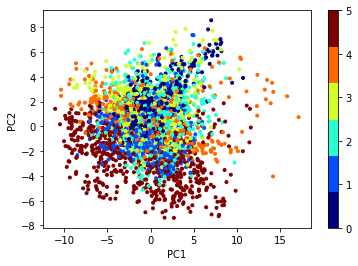

In [47]:
plt.scatter(feature1[:,0],feature1[:,1], marker=".", c=y_train_vec, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

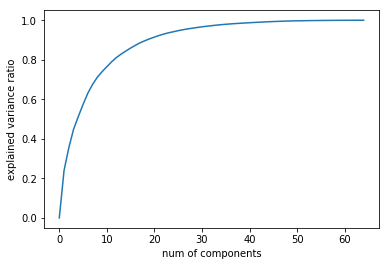

In [48]:
pca.fit(block1)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0, ev_ratio.cumsum()])
plt.xlabel("num of components")
plt.ylabel("explained variance ratio")
plt.plot(ev_ratio)
plt.show()

# block2の特徴ベクトル 

In [49]:
feature2 = pca.fit_transform(block2)

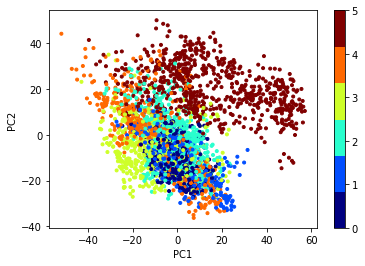

In [50]:
plt.scatter(feature2[:,0],feature2[:,1], marker=".", c=y_train_vec, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

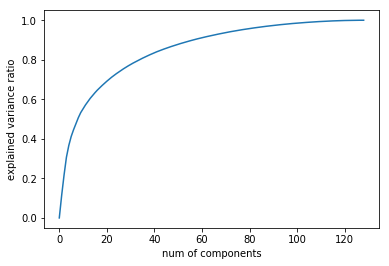

In [51]:
pca.fit(block2)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0, ev_ratio.cumsum()])
plt.xlabel("num of components")
plt.ylabel("explained variance ratio")
plt.plot(ev_ratio)
plt.show()

# block3の特徴ベクトル 

In [52]:
feature3 = pca.fit_transform(block3)

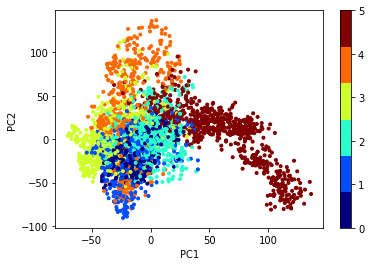

In [53]:
plt.scatter(feature3[:,0],feature3[:,1], marker=".", c=y_train_vec, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

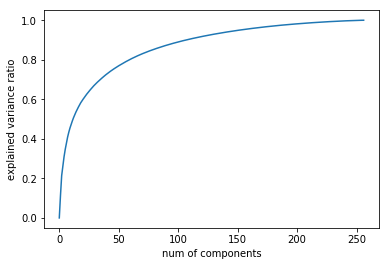

In [54]:
pca.fit(block3)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0, ev_ratio.cumsum()])
plt.xlabel("num of components")
plt.ylabel("explained variance ratio")
plt.plot(ev_ratio)
plt.show()

# block4の特徴ベクトル

In [55]:
feature4 = pca.fit_transform(block4)

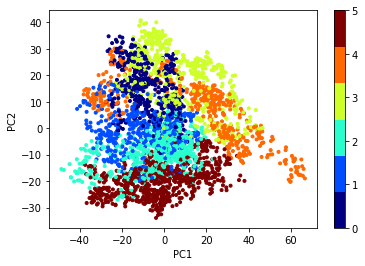

In [56]:
plt.scatter(feature4[:,0],feature4[:,1], marker=".", c=y_train_vec, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

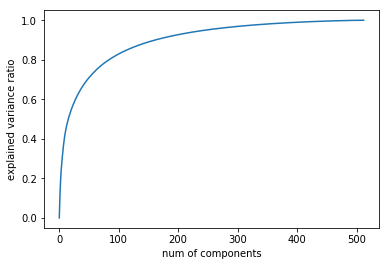

In [57]:
pca.fit(block4)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0, ev_ratio.cumsum()])
plt.xlabel("num of components")
plt.ylabel("explained variance ratio")
plt.plot(ev_ratio)
plt.show()

# block5の特徴ベクトル 

In [58]:
feature5 = pca.fit_transform(block5)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


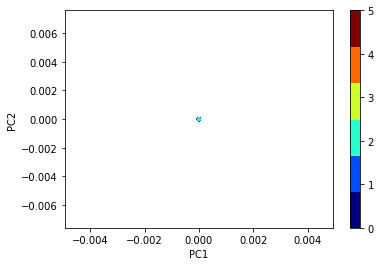

In [59]:
plt.scatter(feature5[:,0],feature5[:,1],marker=".", c=y_train_vec, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


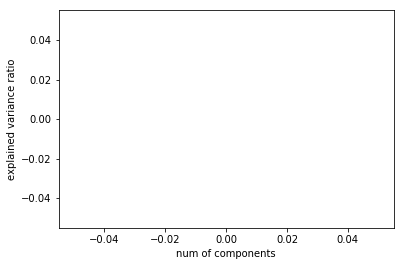

In [60]:
pca.fit(block5)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0, ev_ratio.cumsum()])
plt.xlabel("num of components")
plt.ylabel("explained variance ratio")
plt.plot(ev_ratio)
plt.show()

In [61]:
from mpl_toolkits.mplot3d import Axes3D

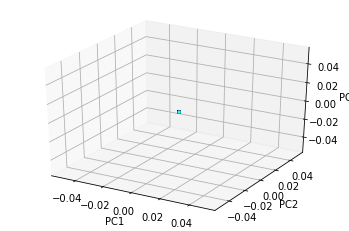

In [62]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(feature5[:,0],feature5[:,1], feature5[:,3], marker=".", c=y_train_vec, cmap=cmap)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# grad-cam

In [63]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [64]:
true = []
for i in range(num_s_class):
    true.append(i)

pred = []

grad_last_conv = full_model.get_layer("block5_conv3")
model_output = full_model.output[:,0]
grads = K.gradients(model_output, grad_last_conv.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function([full_model.input], [pooled_grads, grad_last_conv.output[0]])

for n in range(len(grad_test_img_path)):
    img_keras = image.load_img(grad_test_img_path[n], target_size=(224, 224))
    img_tensor = image.img_to_array(img_keras)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    predicts = full_model.predict(img_tensor)
    s_class_num = np.argmax(predicts)
    pred.append(s_class_num)
    img_tensor /= 255.
    pooled_grads_val, conv_output_val = iterate([img_tensor])
    for i in range(pooled_grads_val.shape[0]):
        conv_output_val[:, :, i] *= pooled_grads_val[i]
    heatmap = np.mean(conv_output_val, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    img = cv2.imread(grad_test_img_path[n])
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    save_dir = '../data/gradcam_img/VGG16/stairs'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)	# Make a directory
    #保存先ディレクトリ名はその画像のクラス，画像の予測値を画像の名前に書き込む
    cv2.imwrite(save_dir+'/heatmap_'+s_class[s_class_num]+'_'+str(n)+'_'+'.jpg', superimposed_img)
    print('Saved: ', save_dir+'/heatmap_'+s_class[s_class_num]+'.jpg')

In [74]:
def grad_cam(input_model, image, cls, layer_name):
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    # Normalize if necessary
    # grads = normalize(grads)
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # Process CAM
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam_max = cam.max() 
    if cam_max != 0: 
        cam = cam / cam_max
    return cam


In [77]:
for n in range(len(grad_test_img_path)):
    cam = grad_cam(input_model=full_model, image=grad_test_img_path[n], cls=-1, layer_name="block5_conv3")
    save_dir = '/home/tamaru/scene_categorize/main/data/gradcam_img/VGG16/stairs/else'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)	# Make a directory
    #保存先ディレクトリ名はその画像のクラス，画像の予測値を画像の名前に書き込む
    cv2.imwrite(save_dir+'/heatmap_'+s_classlist[s_class_num]+'_'+str(n)+'_'+'.jpg', cam)
    print('Saved: ', save_dir+'/heatmap_'+s_classlist[s_class_num]+'.jpg')

ValueError: could not convert string to float: '/home/tamaru/scene_categorize/main/data/stairs_frames/4gokan/4gokan_stairs/4gokan_stairs_0_img_000149.png'

In [72]:
df_grad = pd.DataFrame(grad_test_img_path)
df_grad

0
0   /home/tamaru/scene_categorize/main/data/stairs...
1   /home/tamaru/scene_categorize/main/data/stairs...
2   /home/tamaru/scene_categorize/main/data/stairs...
3   /home/tamaru/scene_categorize/main/data/stairs...
4   /home/tamaru/scene_categorize/main/data/stairs...
5   /home/tamaru/scene_categorize/main/data/stairs...
6   /home/tamaru/scene_categorize/main/data/stairs...
7   /home/tamaru/scene_categorize/main/data/stairs...
8   /home/tamaru/scene_categorize/main/data/stairs...
9   /home/tamaru/scene_categorize/main/data/stairs...
10  /home/tamaru/scene_categorize/main/data/stairs...
11  /home/tamaru/scene_categorize/main/data/stairs...

In [73]:
cmx = confusion_matrix(true, pred)
plt.figure(figsize=(12,12))
sns.heatmap(cmx, annot=True)
plt.ylabel("truth")
plt.xlabel("prediction")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [6, 12]

In [ ]:
print(cor_table)

prediction->edge ==> padding